In [7]:
embeddings_path = '../data/embeddings/*.h5'

In [8]:
from difflib import SequenceMatcher
import glob
import re

import h5py
import numpy as np
import pandas as pd
import scipy
from scipy.spatial import distance

In [9]:
all_composers = [(i, *c) for i, c in enumerate(pd.read_csv('../data/composers.csv', sep='|').values)]
all_composers_by_birth_year = sorted([c for c in all_composers], key=lambda c: int(c[2]))
all_composer_ids_by_birth_year = [c[0] for c in all_composers_by_birth_year]

In [10]:
def path_to_epoch(path):
    return int(re.search(r'\-(\d*)\-\d*', path).groups()[0])


def path_to_embedding(path):
    with h5py.File(path, 'r') as f:
        return f.get('doc_embeddings').value


def sort_embeddings(embeddings, keys):
    return embeddings[keys]

In [11]:
sorted_embeddings_paths = sorted(glob.glob(embeddings_path), key=path_to_epoch)
all_embeddings = [sort_embeddings(path_to_embedding(path), all_composer_ids_by_birth_year) for path in sorted_embeddings_paths]
# Prepend random uniform embeddings 
all_embeddings = [np.random.uniform(size=(len(all_composers), 300))] + all_embeddings

In [12]:
def self_similarity(embeddings):
    return distance.cdist(embeddings, embeddings, metric='cosine')

all_similarities = [self_similarity(embeddings) for embeddings in all_embeddings]

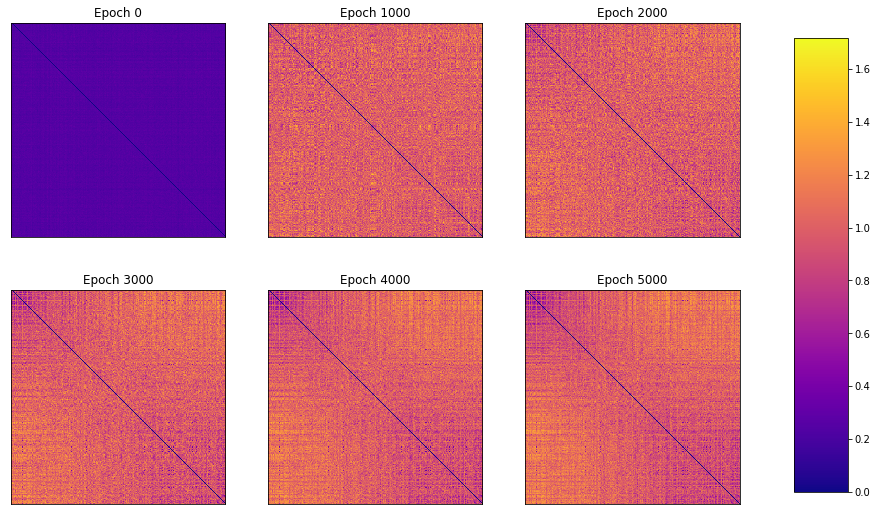

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

fig, axn = plt.subplots(2, 3, figsize=(15, 9), sharex=True, sharey=True)

epochs = [0, 1000, 2000, 3000, 4000, 5000]
select_similarities = all_similarities[0::4]
max_similarity = np.max([np.max(s) for s in select_similarities])
min_similarity = np.min([np.min(s) for s in select_similarities])

for ax, similarity, epochs in zip(axn.flat, select_similarities, epochs):
    im = ax.imshow(similarity, vmin=min_similarity, vmax=max_similarity, cmap='plasma')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_title('Epoch {}'.format(epochs))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)